In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from IPython.display import clear_output

In [2]:
file_path = '/home/kal/Documents/codeprojects/Unsupervised_Learning/data/cara.csv'
cars = pd.read_csv(file_path)
cars.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [3]:
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
cars = cars.dropna(subset=features)

In [4]:
data = cars[features].copy()

#center 
data = ((data - data.mean()) / (data.max() - data.min()) )
data.describe()

,year,mileage,tax,mpg,engineSize
count,1.796500e+04,1.796500e+04,1.796500e+04,1.796500e+04,1.796500e+04
mean,-1.309946e-15,-7.910300e-18,3.955150e-18,2.432417e-17,-4.429768e-17
std,3.203665e-02,1.096137e-01,1.069145e-01,5.594463e-02,8.647428e-02
min,-3.260402e-01,-1.315145e-01,-1.954044e-01,-2.050110e-01,-2.701653e-01
25%,-1.354022e-02,-7.530063e-02,-1.436802e-01,-3.097785e-02,-7.016532e-02
50%,2.084783e-03,-2.882540e-02,5.459562e-02,5.486236e-03,-3.016532e-02
75%,1.770978e-02,4.334744e-02,5.459562e-02,4.305530e-02,2.983468e-02
max,6.739598e-01,8.684855e-01,8.045956e-01,7.949890e-01,7.298347e-01


In [5]:
data.mean()

year         -1.309946e-15
mileage      -7.910300e-18
tax           3.955150e-18
mpg           2.432417e-17
engineSize   -4.429768e-17
dtype: float64

In [6]:
assert(round(data.mean(), 2).all() == 0.0)

In [7]:
#init
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: x.sample().iloc[0])
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [8]:
data.apply(lambda x: x.sample().iloc[0])

year          0.033335
mileage      -0.085608
tax          -0.195404
mpg           0.043055
engineSize    0.029835
dtype: float64

In [9]:
centroids = random_centroids(data, 5)
centroids

,0,1,2,3,4
year,0.048960,0.017710,-0.013540,0.002085,0.017710
mileage,0.082032,-0.030638,-0.087038,0.132690,0.092998
tax,0.054596,-0.195404,-0.160922,0.054596,0.054596
mpg,-0.050867,0.019298,-0.019928,-0.019928,0.113774
engineSize,-0.070165,-0.070165,0.029835,0.129835,-0.070165


In [10]:
def get_labels(data, centroids):
    disatances = centroids.apply(lambda x: np.sqrt(((data - x)**2).sum(axis=1)))
    return disatances.idxmin(axis=1)

In [12]:
lables = get_labels(data, centroids)
lables.value_counts()

0    7331
3    4001
1    3513
4    2181
2     939
Name: count, dtype: int64

In [13]:
def new_centroids(data, lables):
    return data.groupby(lables).apply(lambda x: x.mean()).T

In [15]:
centroids = new_centroids(data, lables)
centroids

,0,1,2,3,4
year,0.015711,-0.020661,-0.000494,-0.016914,0.011713
mileage,-0.053651,0.045511,-0.053499,0.080025,-0.016742
tax,0.053448,-0.176862,-0.081839,0.048220,0.051999
mpg,-0.020933,0.039872,0.016817,-0.033416,0.060200
engineSize,-0.043896,-0.037595,0.063637,0.117418,-0.034695


In [17]:
def plot_cluster(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centrods_2d = pca.transform(centroids.T)
    
    clear_output(wait=True)
    
    plt.title(f'Iteration: {iteration}')
    plt.scatter(x=data_2d[:,0], y = data_2d[:,1], c=labels)
    plt.scatter(x=centrods_2d[:,0], y = centrods_2d[:,1])
    plt.show()

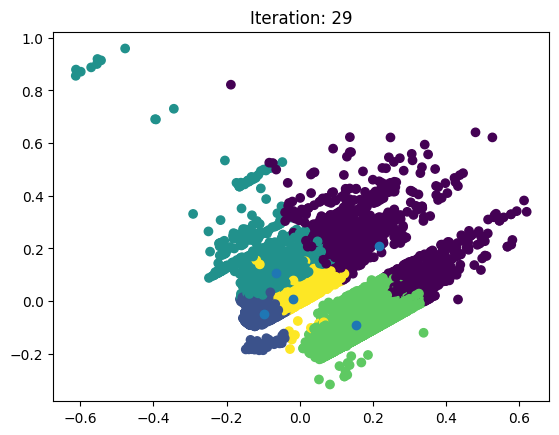

In [18]:
max_iteration = 100
k = 5

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iteration and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels)
    plot_cluster(data, labels, centroids, iteration)
    iteration += 1